# 第三章 运行Tensorflow

## 在Anaconda中安装tensorflow

Python环境：mac OS Sierra 10.12.5 Anaconda4.4.0 Python3.6
打开Terminal，进入到安装目录的bin下面，

➜  bin ./conda list

列出安装的包。

现在需要安装tensorflow，输入

➜  bin ./anaconda search -t conda tensorflow

![包安装源](Bitmaps/chap3/1.png)

看到支持mac的都可以装，只要版本不太旧。

安装前可以进一步查看包的情况

➜  bin ./anaconda show conda-forge/tensorflow

![包详情](Bitmaps/chap3/2.png)

最后一行指出了安装的命令

执行 ➜  bin ./conda install --channel https://conda.anaconda.org/conda-forge tensorflow

![安装包](Bitmaps/chap3/3.png)

上述过程回答y

## 运行tensorflow示例代码

0,[[-0.31096351  0.12390709]],[ 1.12901199]
20,[[-0.0190543   0.10502016]],[ 0.40928334]
40,[[ 0.07628237  0.16986328]],[ 0.32786167]
60,[[ 0.09527743  0.19070399]],[ 0.30733731]
80,[[ 0.09906036  0.19718167]],[ 0.30198598]
100,[[ 0.09981324  0.19915487]],[ 0.30054948]
120,[[ 0.09996293  0.19974835]],[ 0.30015463]
140,[[ 0.09999268  0.19992542]],[ 0.30004406]
160,[[ 0.09999855  0.19997796]],[ 0.30001268]
180,[[ 0.0999997   0.19999349]],[ 0.30000368]
200,[[ 0.09999995  0.19999811]],[ 0.30000106]


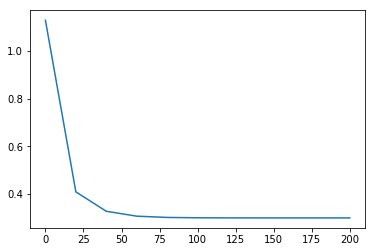

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

x_data = np.float32(np.random.rand(2, 100))
y_data = np.dot([0.100, 0.200], x_data) + 0.300
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
x_axis = []
y_axis = []
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:        
        x_axis.append(step)
        b_result = sess.run(b)
        y_axis.append(b_result[0])
        print('%s,%s,%s' % (step, sess.run(W), b_result))
        
plt.plot(x_axis, y_axis)
plt.show()